# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


In [3]:
df.head()

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0


In [4]:
X

,make,transmission,state,condition,odometer,auction_value
0,nissan,automatic,md,4.8,NaN,14350.0
1,ford,automatic,mo,3.7,29398.0,17600.0
2,ford,automatic,fl,3.2,32180.0,19100.0
3,nissan,automatic,ca,NaN,30798.0,11950.0
4,ford,automatic,nj,2.8,29526.0,28000.0
...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN
9051,ford,automatic,fl,NaN,38810.0,16250.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0
9053,ford,automatic,il,4.6,33114.0,21800.0


In [5]:
y

0       13600.0
1       17100.0
2       17600.0
3       10700.0
4       26100.0
         ...   
9050    11600.0
9051    17300.0
9052    13800.0
9053    27000.0
9054    29800.0
Name: selling_price, Length: 9055, dtype: float64

## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [6]:
# insert code here
df.dtypes

make              object
transmission      object
state             object
condition        float64
odometer         float64
auction_value    float64
selling_price    float64
dtype: object

In [7]:
catfeatureNames = [col for col in df[features].columns if df[col].dtype == 'object']
NumfeatureNames = [col for col in df[features].columns if col not in catfeatureNames]

In [8]:
print(f'Categorical features are {catfeatureNames}')
print(f'Numerical features are {NumfeatureNames}')

Categorical features are ['make', 'transmission', 'state']
Numerical features are ['condition', 'odometer', 'auction_value']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [9]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])


numprocessing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, NumfeatureNames)])

print(numprocessing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value'])])


## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [10]:
# insert code here
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

catprocessing_pipeline = ColumnTransformer(transformers=[('create_dummies', cat_pipeline, catfeatureNames)])

print(catprocessing_pipeline)

ColumnTransformer(transformers=[('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


In [11]:
X_train_cattransformed = catprocessing_pipeline.fit_transform(X_train)

# check the shape of the transformed data
print(f"Number of columns that contains transformed data is {X_train_cattransformed.shape[1]}")

# check the data types of the transformed data
print(f"The datatype of the training dataset is {X_train_cattransformed.dtype}")

Number of columns that contains transformed data is 41
The datatype of the training dataset is float64


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [12]:
# insert code here
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])


cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, NumfeatureNames),
                                                      ('create_dummies', cat_pipeline, catfeatureNames)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['condition', 'odometer', 'auction_value']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['make', 'transmission', 'state'])])


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [13]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [14]:
sellingprice_predictions = modeling_pipeline.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, sellingprice_predictions)
r2

0.8838275826302848

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

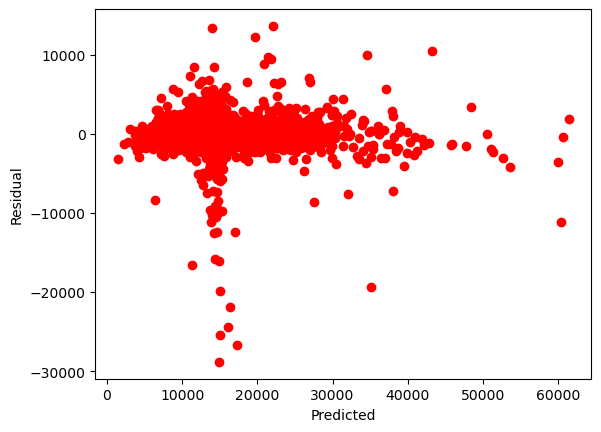

In [16]:
# insert code here
plt.plot(sellingprice_predictions, sellingprice_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

Insert description here.

In this residual plot, the points are scattered randomly around the residual=0 line. We can conclude that a linear model is appropriate for modeling this data.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [17]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=100))])
modeling_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                  

In [18]:
rid_pred = modeling_pipeline_ridge.predict(X_test)

In [19]:
r2_rid = r2_score(y_test, rid_pred)
r2_rid

0.8824295262286399

High R2 values were obtained for both the linear regression and the ridge regression models. This indicates that they both fit the training data well . Yet, there is no statistically significant difference between the two models R2 values. This may be because the additional penalty term in the ridge regression did not significantly affect the model's performance.